In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('insurance.csv')

# Preprocess the data
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Create transformers for the pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing the data
X = data.drop('charges', axis=1)
y = data['charges']
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [8]:
# Create the neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))  # No activation function for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {mae}")

Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 13514.0635 - val_loss: 12634.8457
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 13376.2314 - val_loss: 12179.0488
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 11816.7793 - val_loss: 9171.5850
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 8571.5488 - val_loss: 7628.8232
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 7306.9263 - val_loss: 6670.3403
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 6559.5796 - val_loss: 5850.4702
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 5865.1572 - val_loss: 5099.8066
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 5246.8535 - val_loss: 4569.1592
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 4644.6670 - val_loss: 3963.7727
Epoch 10/100
27/27 [==============================

34/34 [==============================] - 0s 1ms/step - loss: 1847.4998
Test Loss (MSE): 1650.6563720703125
Train Loss (MSE): 1847.499755859375


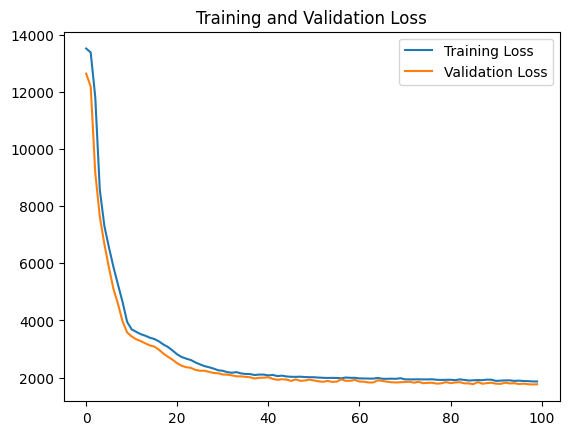

In [9]:
loss_test = model.evaluate(X_test, y_test)
loss_train = model.evaluate(X_train, y_train)
print(f"Test Loss (MSE): {loss_test}")
print(f"Train Loss (MSE): {loss_train}")
import matplotlib.pyplot as plt

# Плотуємо графік втрат під час навчання
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
